# Importing Libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('cleaned_traffic_data.csv')  

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour,Weekday,is_weekend,is_rush_hour,rain_1h_log,snow_1h_log
0,7,288.28,0.0,0.0,40,1,24,2012-10-02 09:00:00,5545,2012,10,2,9,1,0,1,0.0,0.0
1,7,289.36,0.0,0.0,75,1,2,2012-10-02 10:00:00,4516,2012,10,2,10,1,0,0,0.0,0.0
2,7,289.58,0.0,0.0,90,1,19,2012-10-02 11:00:00,4767,2012,10,2,11,1,0,0,0.0,0.0
3,7,290.13,0.0,0.0,90,1,19,2012-10-02 12:00:00,5026,2012,10,2,12,1,0,0,0.0,0.0
4,7,291.14,0.0,0.0,75,1,2,2012-10-02 13:00:00,4918,2012,10,2,13,1,0,0,0.0,0.0


## Dropping non-useful features

In [4]:
df = df.drop(columns=['date_time', 'weather_main', 'weather_description'])

## Assigning features and target for regression

In [5]:
X = df.drop(columns=['traffic_volume'])  # All columns *except* the one i want to predict
y = df['traffic_volume']                 # The column we want to predict

## Scaling

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Fold

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_mse_scores = []
knn_mse_scores = []
dt_mse_scores = []
rf_mse_scores = []

## Linear Regression

Linear Regression MSE (5-Fold): 5073610.634704475


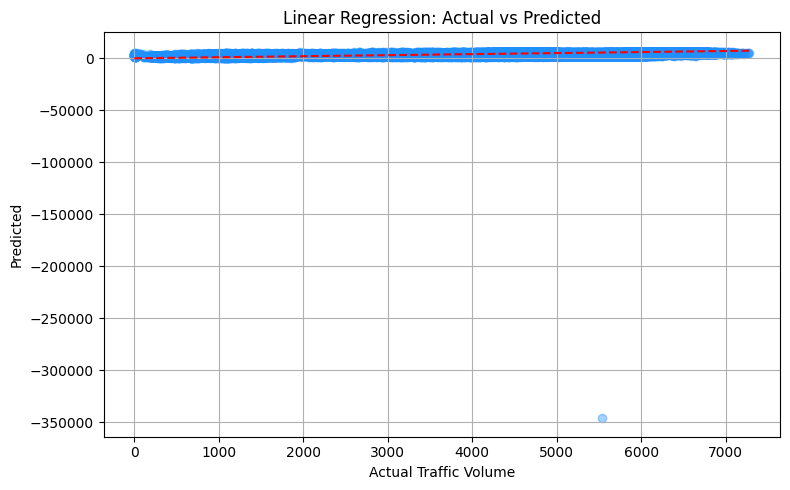

In [8]:
lr_actuals = []
lr_predictions = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    lr_mse_scores.append(mean_squared_error(y_test, y_pred))
    lr_actuals.extend(y_test)
    lr_predictions.extend(y_pred)

print("Linear Regression MSE (5-Fold):", np.mean(lr_mse_scores))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(lr_actuals, lr_predictions, alpha=0.4, color='dodgerblue')
plt.plot([min(lr_actuals), max(lr_actuals)], [min(lr_actuals), max(lr_actuals)], 'r--')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## KNN

KNN Regression MSE (5-Fold): 711522.3072456141


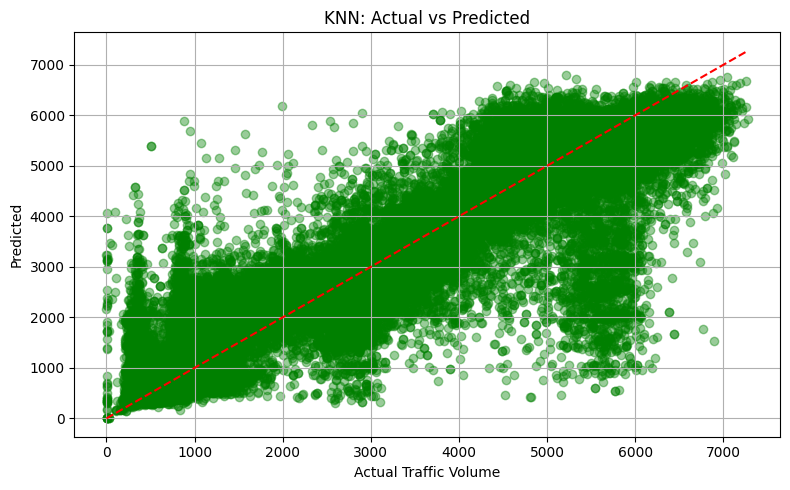

In [9]:
knn_actuals = []
knn_predictions = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    knn_mse_scores.append(mean_squared_error(y_test, y_pred))
    knn_actuals.extend(y_test)
    knn_predictions.extend(y_pred)

print("KNN Regression MSE (5-Fold):", np.mean(knn_mse_scores))

plt.figure(figsize=(8, 5))
plt.scatter(knn_actuals, knn_predictions, alpha=0.4, color='green')
plt.plot([min(knn_actuals), max(knn_actuals)], [min(knn_actuals), max(knn_actuals)], 'r--')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted")
plt.title("KNN: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Decision Tree

Decision Tree MSE (5-Fold): 233868.57641401203


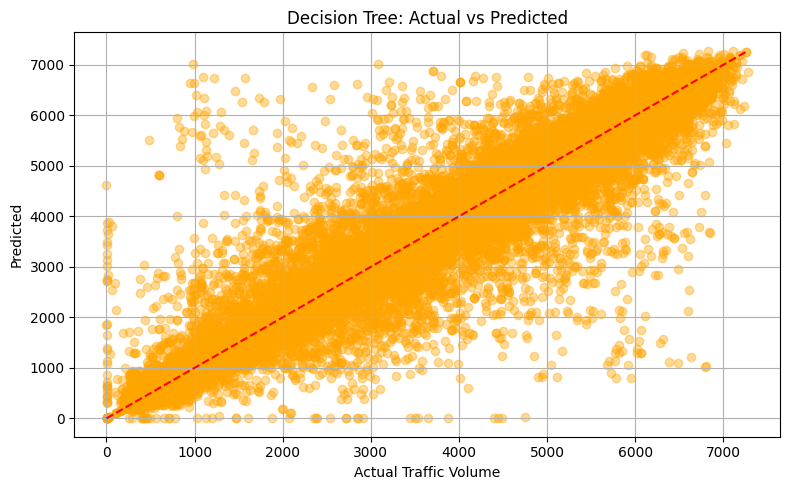

In [10]:
dt_actuals = []
dt_predictions = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    dt_mse_scores.append(mean_squared_error(y_test, y_pred))
    dt_actuals.extend(y_test)
    dt_predictions.extend(y_pred)

print("Decision Tree MSE (5-Fold):", np.mean(dt_mse_scores))

plt.figure(figsize=(8, 5))
plt.scatter(dt_actuals, dt_predictions, alpha=0.4, color='orange')
plt.plot([min(dt_actuals), max(dt_actuals)], [min(dt_actuals), max(dt_actuals)], 'r--')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Random Forest

Random Forest MSE (5-Fold): 133342.18434801037


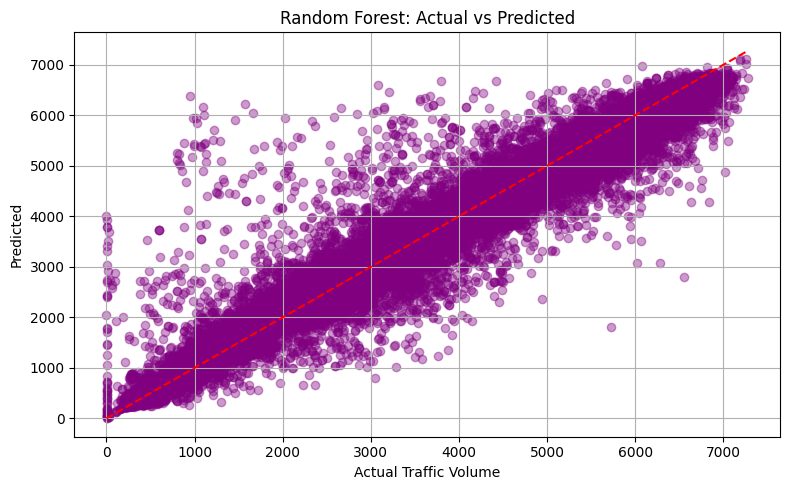

In [11]:
rf_actuals = []
rf_predictions = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    rf_mse_scores.append(mean_squared_error(y_test, y_pred))
    rf_actuals.extend(y_test)
    rf_predictions.extend(y_pred)

print("Random Forest MSE (5-Fold):", np.mean(rf_mse_scores))

plt.figure(figsize=(8, 5))
plt.scatter(rf_actuals, rf_predictions, alpha=0.4, color='purple')
plt.plot([min(rf_actuals), max(rf_actuals)], [min(rf_actuals), max(rf_actuals)], 'r--')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## MSE Comparision Across Models

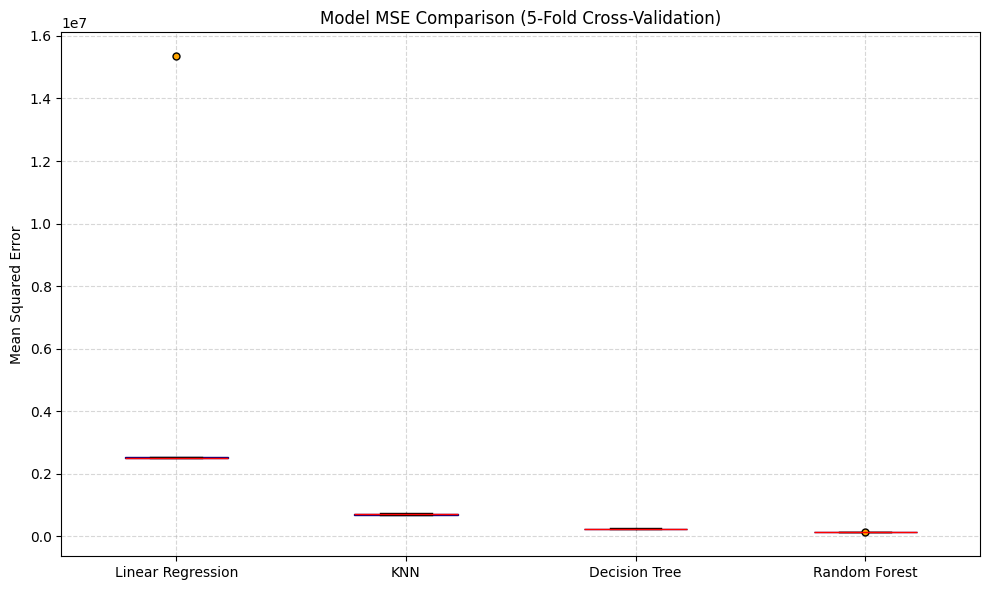

In [13]:
mse_data = [
    lr_mse_scores,
    knn_mse_scores,
    dt_mse_scores,
    rf_mse_scores
]

model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(mse_data, labels=model_names, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=5))

plt.title('Model MSE Comparison (5-Fold Cross-Validation)')
plt.ylabel('Mean Squared Error')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Model Evaluation Summary (based on 5-Fold Cross-Validation)
    Linear Regression had the highest error (MSE ≈ 5,073,610), indicating that it fails to capture the complex, non-linear relationships in the traffic data.

    K-Nearest Neighbors (KNN) improved the performance (MSE ≈ 711,522) by using local patterns, but still struggled with generalization.

    Decision Tree Regression showed significant improvement (MSE ≈ 233,869), leveraging its ability to handle non-linear data and decision rules.

    Random Forest Regression delivered the best performance (MSE ≈ 133,342), demonstrating strong generalization and robustness through its ensemble of decision trees.

## Trying Hold-Out

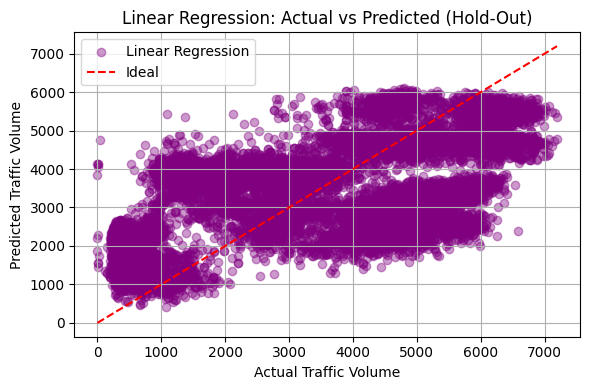

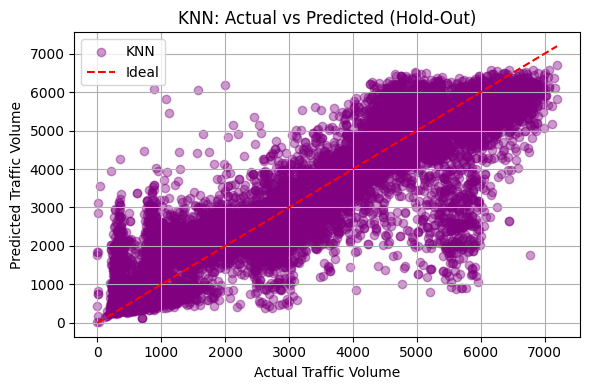

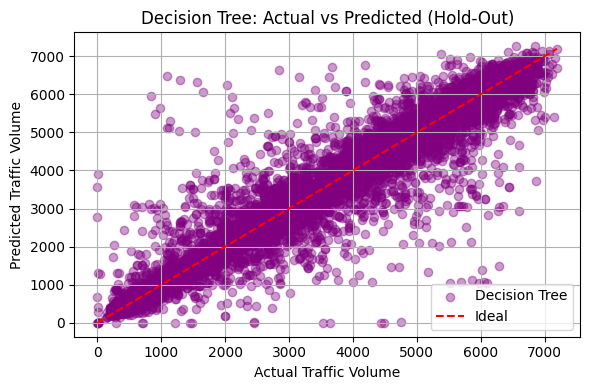

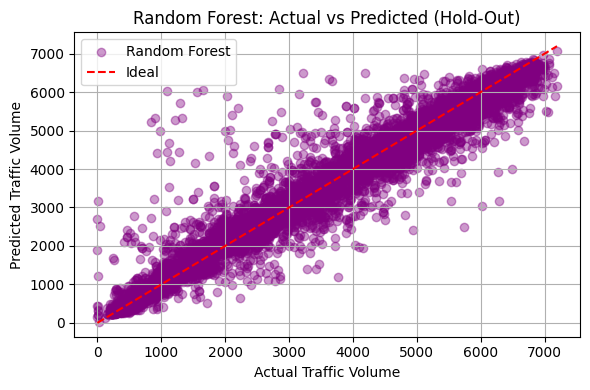


Hold-Out MSEs:
Linear Regression: 2492724.87
KNN: 716959.56
Decision Tree: 232205.61
Random Forest: 131140.73


In [ ]:
# 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Dictionary to hold models and their predictions
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

mse_scores = {}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[name] = mse

    # Plotting actual vs predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.4, label=name, color='purple')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
    plt.xlabel("Actual Traffic Volume")
    plt.ylabel("Predicted Traffic Volume")
    plt.title(f"{name}: Actual vs Predicted (Hold-Out)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


print("\nHold-Out MSEs:")
for name, mse in mse_scores.items():
    print(f"{name}: {mse:.2f}")


## MSE Comparision Across Models

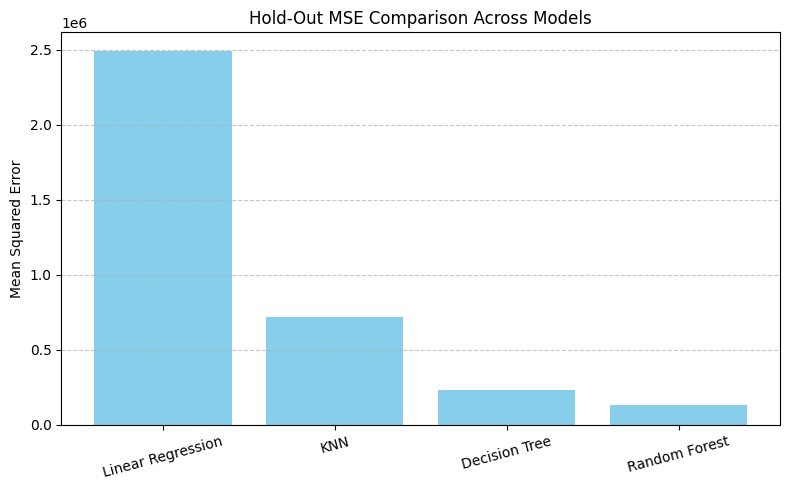

In [15]:
# Extract model names and corresponding MSEs
model_names = list(mse_scores.keys())
mse_values = list(mse_scores.values())

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, mse_values, color='skyblue')
plt.ylabel("Mean Squared Error")
plt.title("Hold-Out MSE Comparison Across Models")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Model Evaluation Summary (based on 5-Fold Cross-Validation & Hold-Out)
    Linear Regression performs poorly:
    Very high MSE, and it's worse in cross-validation — likely due to underfitting (not capturing non-linear relationships).

    K-Nearest Neighbors (KNN) performs similarly in both splits:
    Indicates stable performance, but still not as good as tree-based models.

    Decision Tree is decent, but not as stable:
    It's better than KNN and Linear Regression but not as accurate as Random Forest. It may also overfit, especially on hold-out sets.

    Random Forest is the best overall model:
    It consistently has the lowest MSE in both hold-out and cross-validation, meaning it's more accurate and robust.

## Using Random Forest for Final Prediction

In [18]:
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Checking Feature Importance for Random Forest

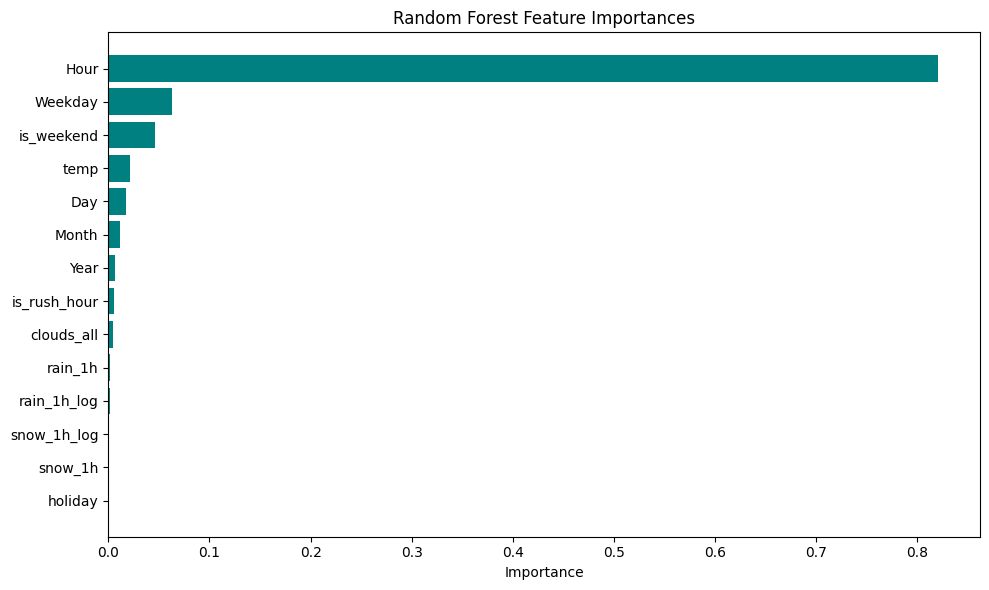

In [ ]:
importances = rf_final.feature_importances_
feature_names = X.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Picking only important features and retraining Random Forest Model

In [19]:
important_features = ['Hour', 'Weekday', 'is_weekend', 'temp', 'Day']
X_top = df[important_features]
y = df['traffic_volume']

In [20]:
rf_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top.fit(X_top, y)

RandomForestRegressor(random_state=42)

#### Asking User Input for Prediction

In [23]:
hour = int(input("Enter Hour (0–23): "))
weekday = int(input("Enter Weekday (0=Mon, 6=Sun): "))
is_weekend = int(input("Is it weekend? (0=No, 1=Yes): "))
temp = float(input("Temperature in Kelvin (e.g., 288.55): "))
day = int(input("Day of month (1–31): "))

print("\nYou entered:")
print(f"Hour: {hour}")
print(f"Weekday: {weekday}")
print(f"Is Weekend: {is_weekend}")
print(f"Temperature: {temp} K")
print(f"Day: {day}")

user_input = np.array([[hour, weekday, is_weekend, temp, day]])
predicted_volume = rf_top.predict(user_input)

print(f"\nPredicted Traffic Volume: {predicted_volume[0]:.2f} vehicles/hour")


You entered:
Hour: 18
Weekday: 6
Is Weekend: 1
Temperature: 245.3 K
Day: 15

Predicted Traffic Volume: 3120.53 vehicles/hour


c:\Users\fasal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
